**Covid19** **analysis**

In [5]:

import pandas as pd

covid19_df = pd.read_csv('country_wise_latest.csv')
gdp_df = pd.read_csv('huhu.csv')
mobility_df = pd.read_csv('Global_Mobility_Report.csv')

print("COVID-19 Dataset Columns:")
print(covid19_df.columns)

print("\nGDP Dataset Columns:")
print(gdp_df.columns)

print("\nCOVID-19 Mobility Dataset Columns:")
print(mobility_df.columns)


<ipython-input-5-cb02eb61f2ff>:7: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  mobility_df = pd.read_csv('Global_Mobility_Report.csv')


COVID-19 Dataset Columns:
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

GDP Dataset Columns:
Index(['#', 'Country/Region', 'GDP\n(nominal, 2022)', 'GDP\n(abbrev.)',
       'GDP\ngrowth', 'Population\n(2022)', 'GDP\nper capita',
       'Share of\nWorld GDP'],
      dtype='object')

COVID-19 Mobility Dataset Columns:
Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_chang

In [2]:

print(covid19_df.head())
print(covid19_df.isnull().sum())
print(covid19_df.describe())


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

Total cases information


<ipython-input-3-63fdda00a20d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')


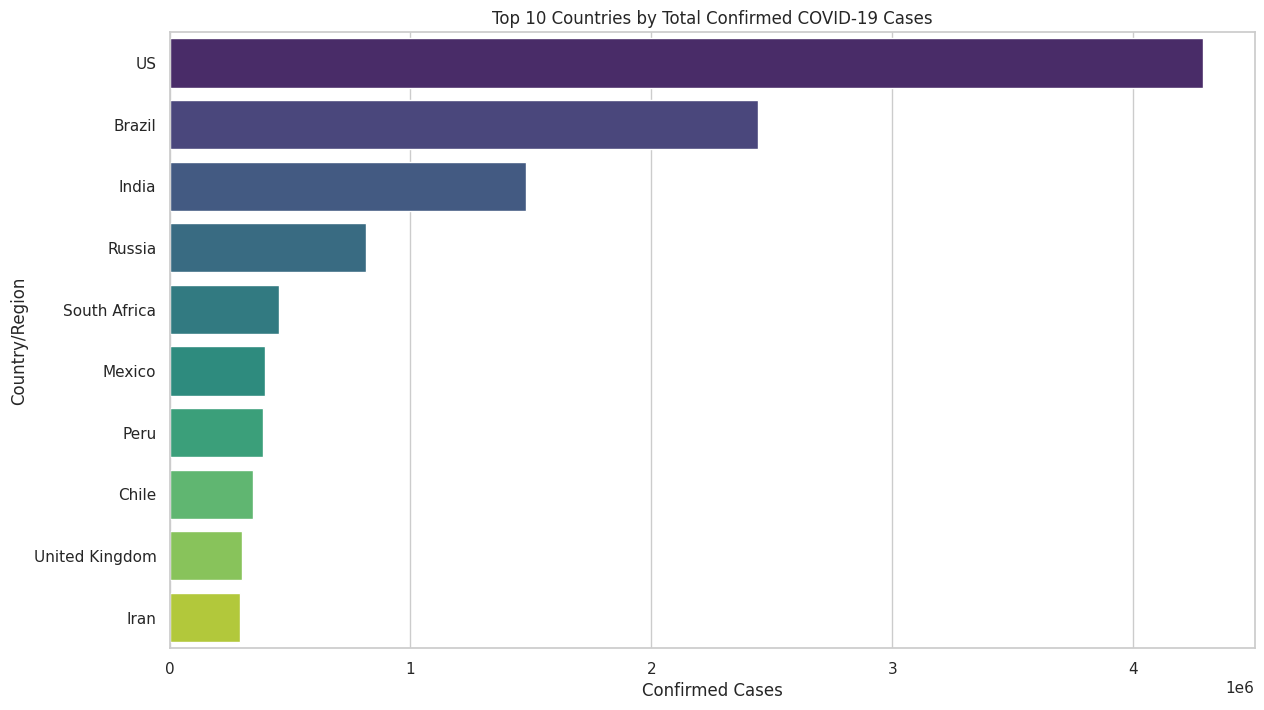

<ipython-input-3-63fdda00a20d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='magma')


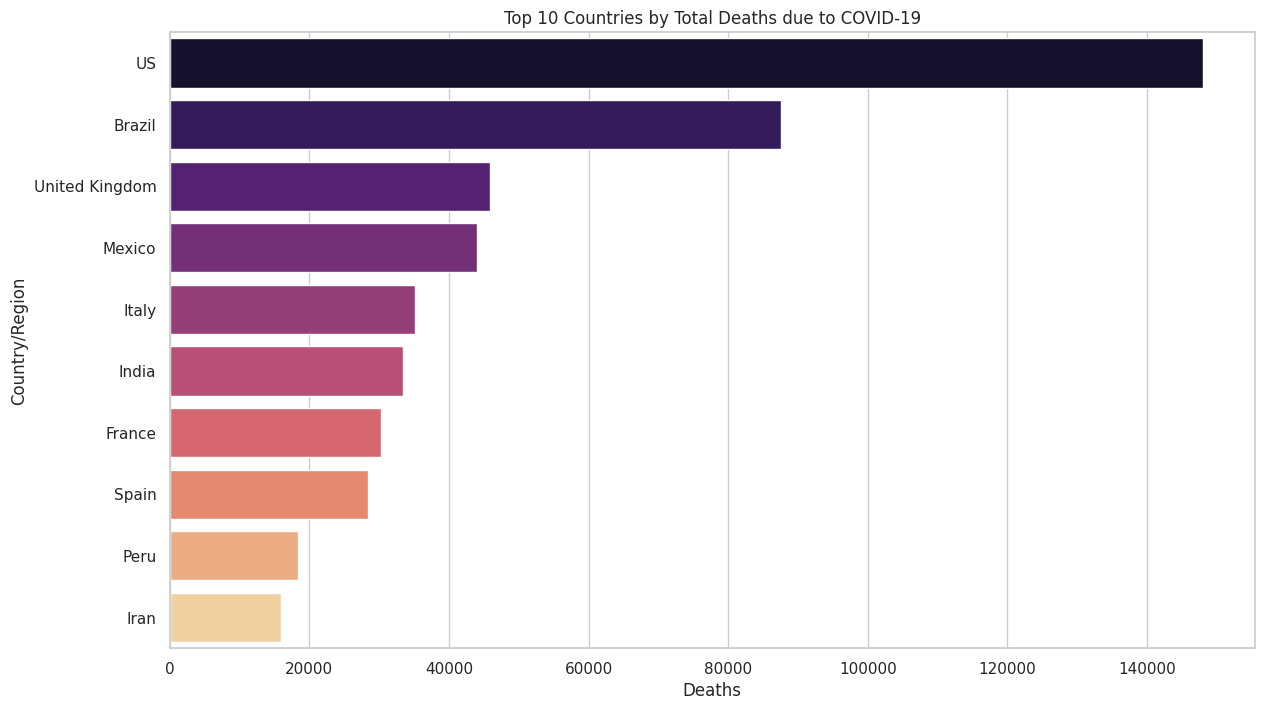

<ipython-input-3-63fdda00a20d>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Active', y='Country/Region', data=top_active, palette='coolwarm')


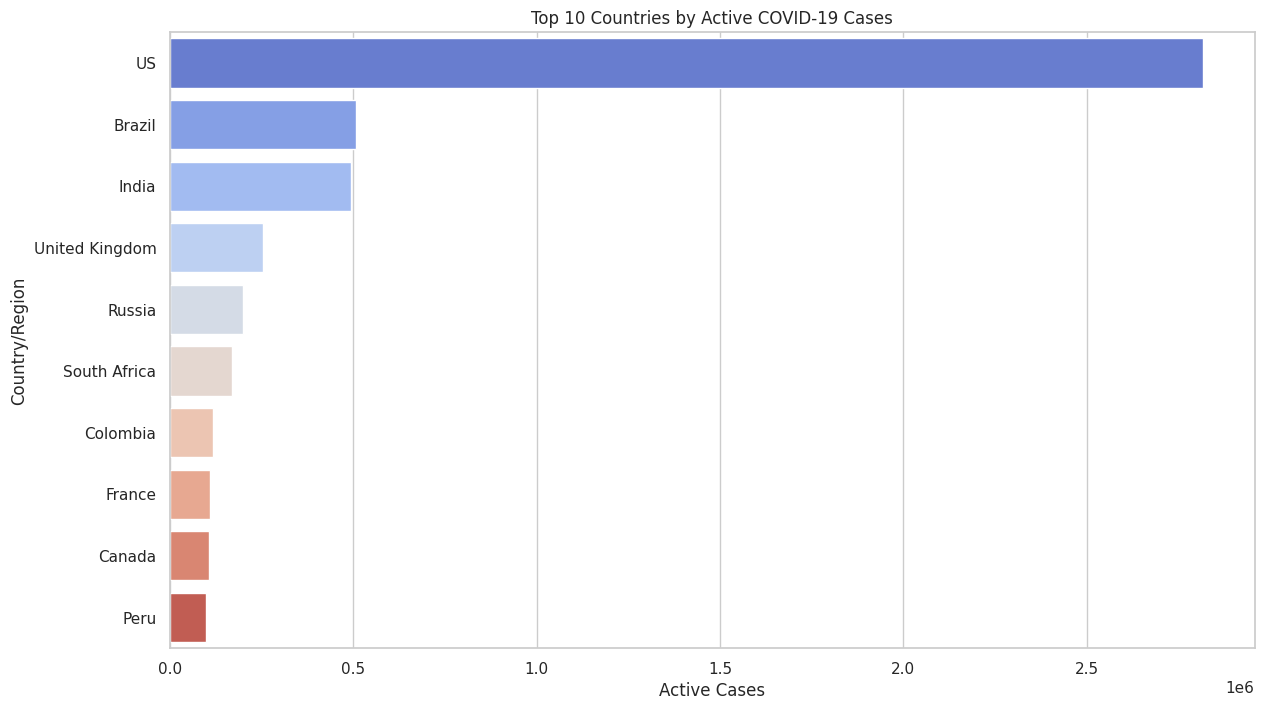

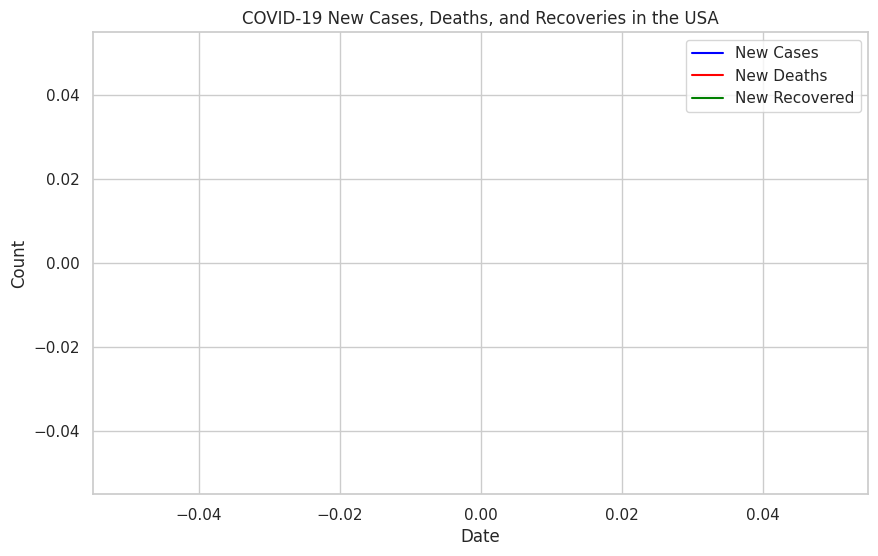

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(14, 8))
top_countries = covid19_df.sort_values('Confirmed', ascending=False).head(10)
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country/Region')
plt.show()

plt.figure(figsize=(14, 8))
top_deaths = covid19_df.sort_values('Deaths', ascending=False).head(10)
sns.barplot(x='Deaths', y='Country/Region', data=top_deaths, palette='magma')
plt.title('Top 10 Countries by Total Deaths due to COVID-19')
plt.xlabel('Deaths')
plt.ylabel('Country/Region')
plt.show()


plt.figure(figsize=(14, 8))
top_active = covid19_df.sort_values('Active', ascending=False).head(10)
sns.barplot(x='Active', y='Country/Region', data=top_active, palette='coolwarm')
plt.title('Top 10 Countries by Active COVID-19 Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country/Region')
plt.show()


usa_data = covid19_df[covid19_df['Country/Region'] == 'USA']
plt.figure(figsize=(10, 6))
plt.plot(usa_data['New cases'], label='New Cases', color='blue')
plt.plot(usa_data['New deaths'], label='New Deaths', color='red')
plt.plot(usa_data['New recovered'], label='New Recovered', color='green')
plt.title('COVID-19 New Cases, Deaths, and Recoveries in the USA')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


GDP vs covid19


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0         Angola        950      41        242     667         18           1   
1         Angola        950      41        242     667         18           1   
2         Angola        950      41        242     667         18           1   
3         Angola        950      41        242     667         18           1   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  ...  \
0              0                4.32                  25.47  ...   
1              0                4.32                  25.47  ...   
2              0                4.32                  25.47  ...   
3              0                4.32                  25.47  ...   
4              0                4.32                  25.47  ...   

   iso_3166_2_code  census_fips_code                     place_id        date  \
0              NaN     

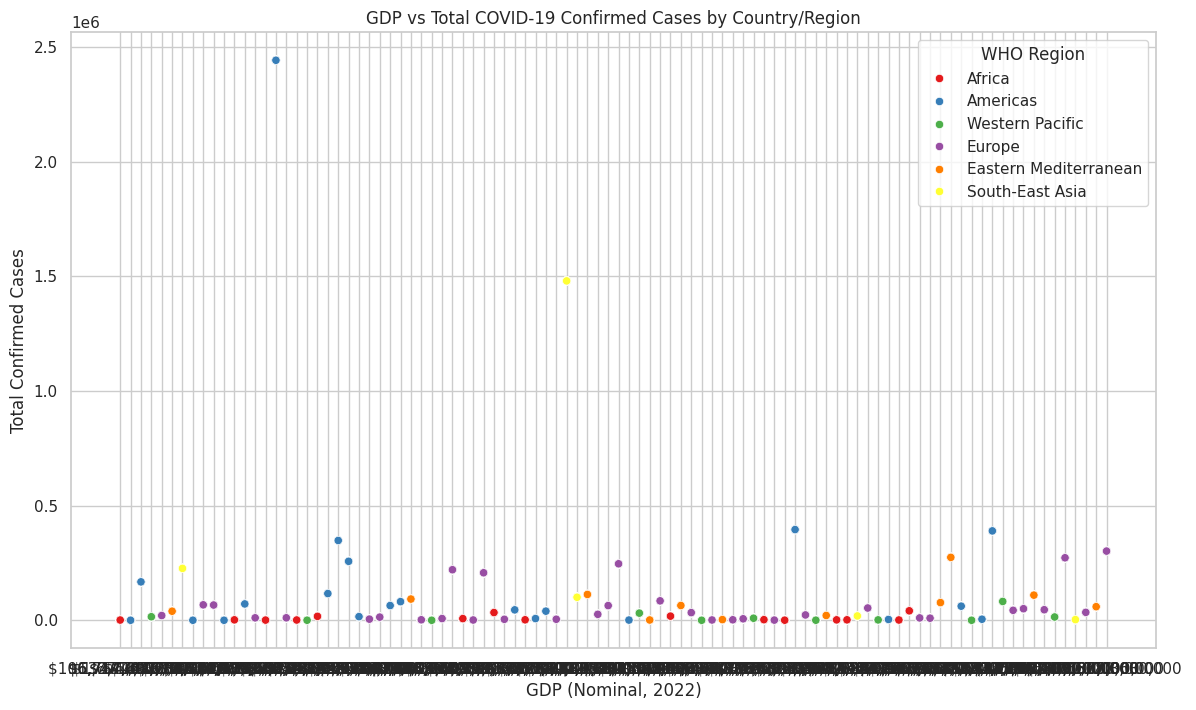

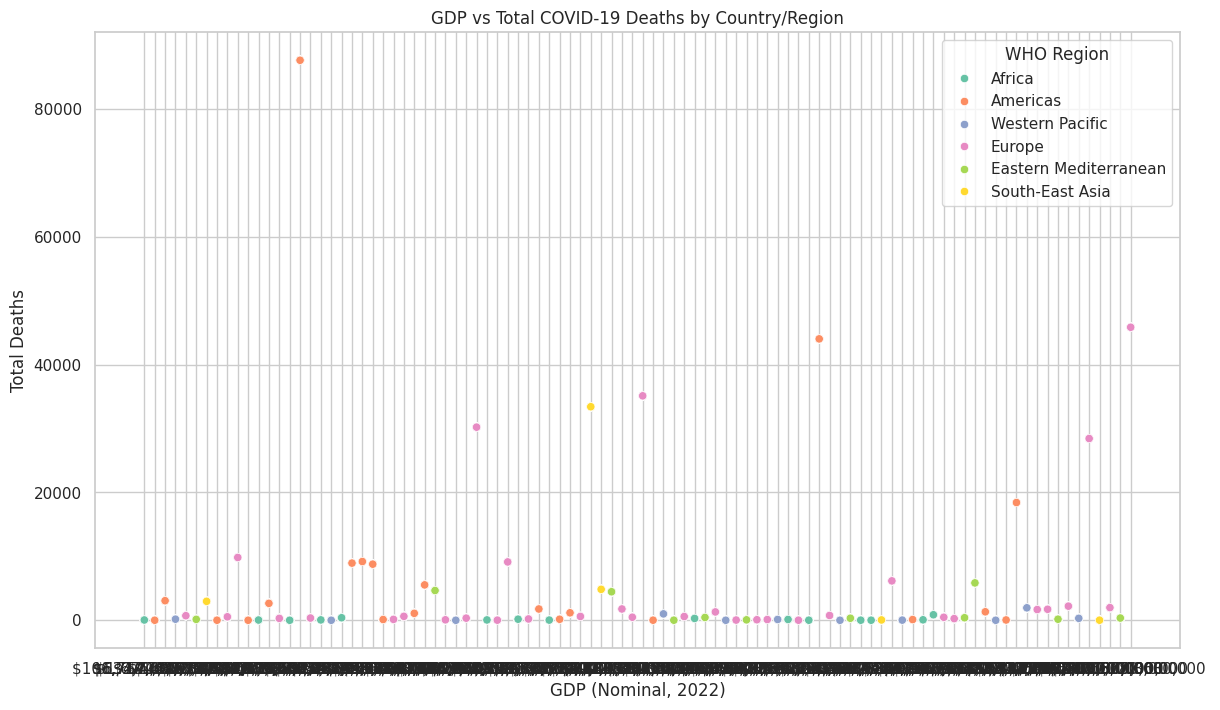

In [6]:

covid_gdp_df = pd.merge(covid19_df, gdp_df, left_on='Country/Region', right_on='Country/Region', how='inner')
covid_mobility_df = pd.merge(covid_gdp_df, mobility_df, left_on='Country/Region', right_on='country_region', how='inner')


print(covid_mobility_df.head())


plt.figure(figsize=(14, 8))
sns.scatterplot(x='GDP\n(nominal, 2022)', y='Confirmed', data=covid_mobility_df, hue='WHO Region', palette='Set1')
plt.title('GDP vs Total COVID-19 Confirmed Cases by Country/Region')
plt.xlabel('GDP (Nominal, 2022)')
plt.ylabel('Total Confirmed Cases')
plt.show()


plt.figure(figsize=(14, 8))
sns.scatterplot(x='GDP\n(nominal, 2022)', y='Deaths', data=covid_mobility_df, hue='WHO Region', palette='Set2')
plt.title('GDP vs Total COVID-19 Deaths by Country/Region')
plt.xlabel('GDP (Nominal, 2022)')
plt.ylabel('Total Deaths')
plt.show()


Distribution


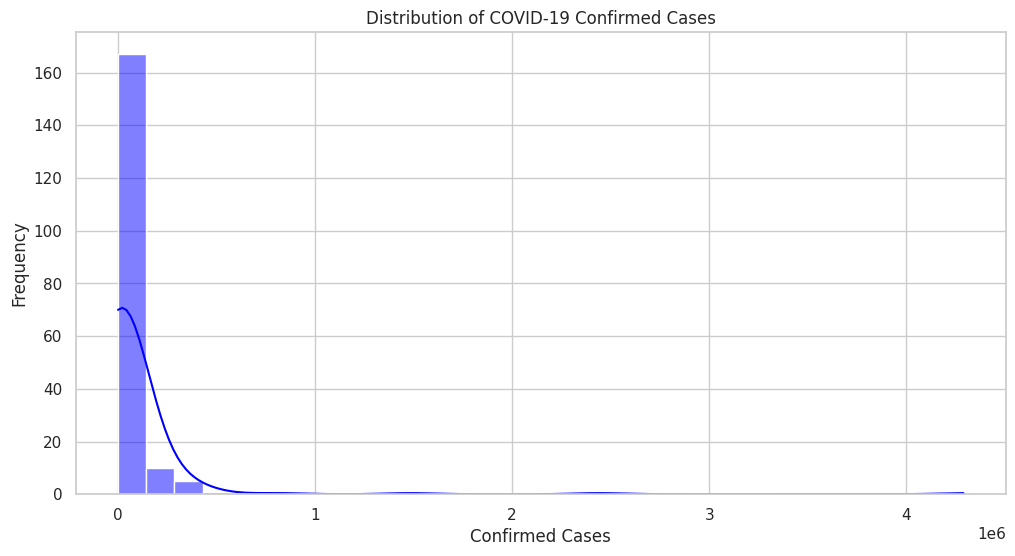

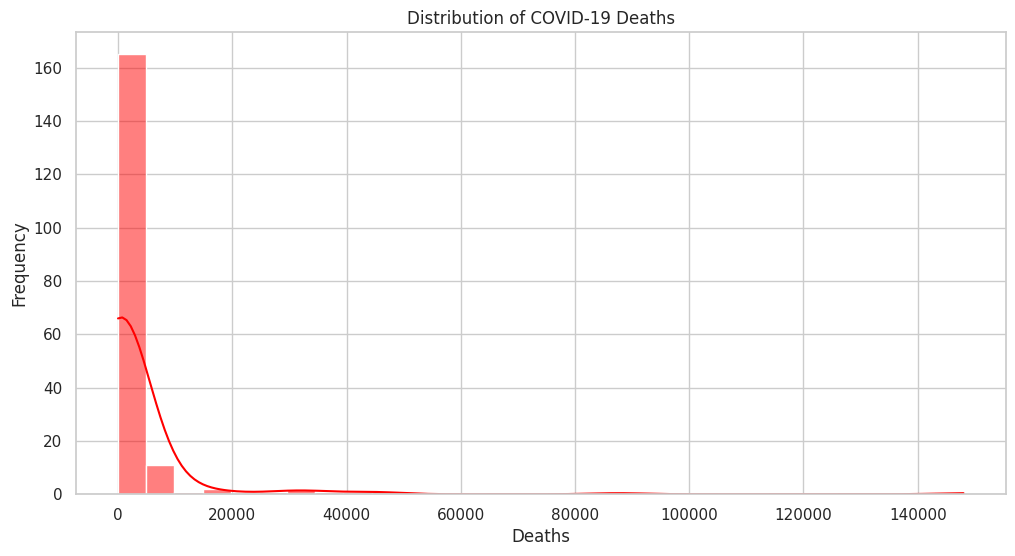

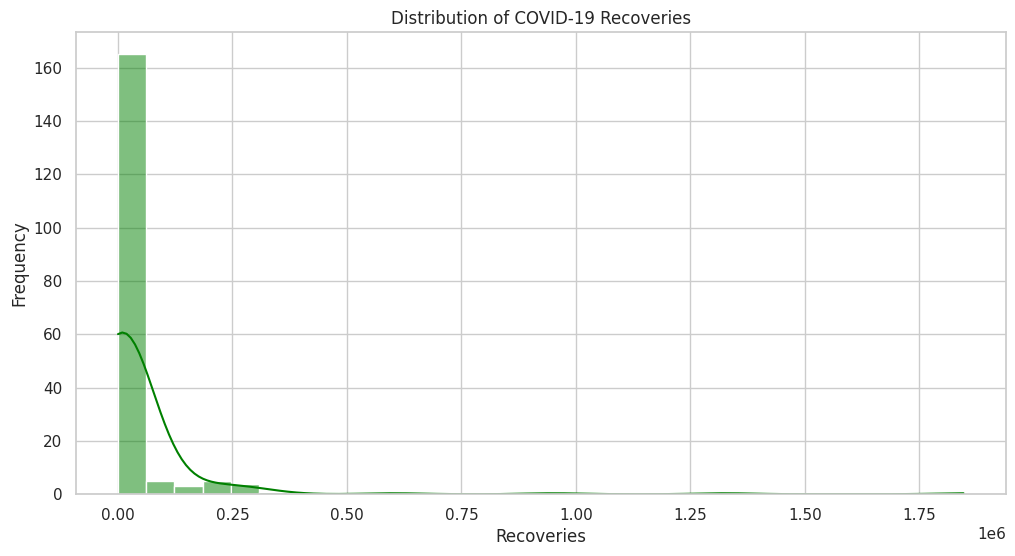

In [7]:

plt.figure(figsize=(12, 6))
sns.histplot(covid19_df['Confirmed'], bins=30, kde=True, color='blue')
plt.title('Distribution of COVID-19 Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(covid19_df['Deaths'], bins=30, kde=True, color='red')
plt.title('Distribution of COVID-19 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(covid19_df['Recovered'], bins=30, kde=True, color='green')
plt.title('Distribution of COVID-19 Recoveries')
plt.xlabel('Recoveries')
plt.ylabel('Frequency')
plt.show()


WHO data


<ipython-input-8-812f7ce10931>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_cases.index, y=region_cases.values, palette='Blues_d')


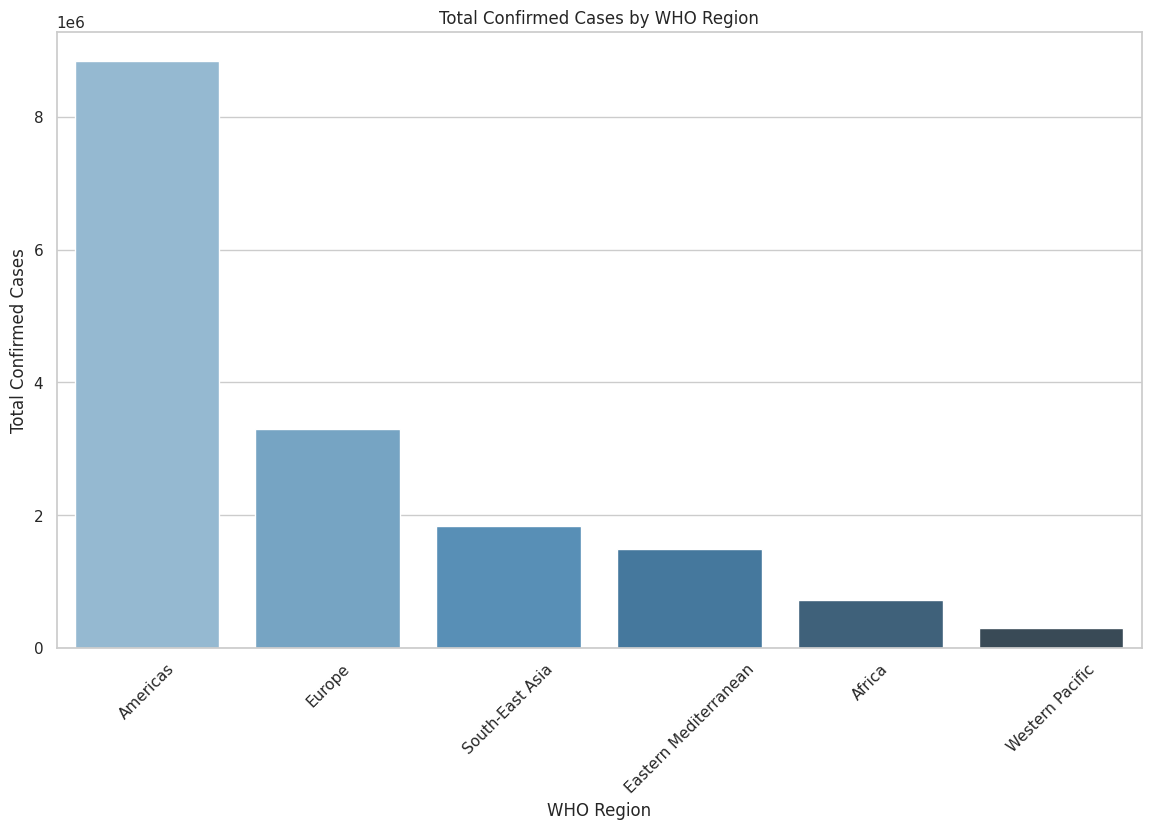

<ipython-input-8-812f7ce10931>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_deaths.index, y=region_deaths.values, palette='Reds_d')


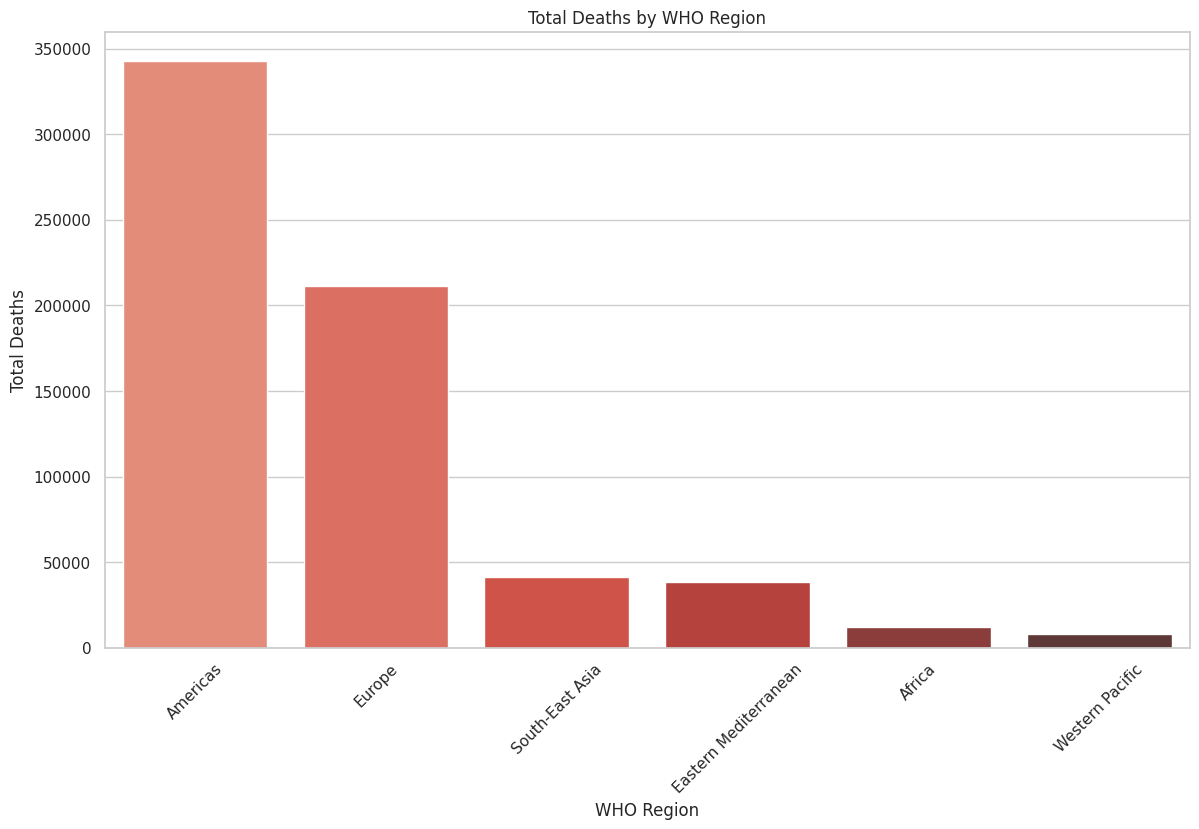

In [8]:
# Total Confirmed cases by WHO Region
plt.figure(figsize=(14, 8))
region_cases = covid19_df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
sns.barplot(x=region_cases.index, y=region_cases.values, palette='Blues_d')
plt.title('Total Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Total Deaths by WHO Region
plt.figure(figsize=(14, 8))
region_deaths = covid19_df.groupby('WHO Region')['Deaths'].sum().sort_values(ascending=False)
sns.barplot(x=region_deaths.index, y=region_deaths.values, palette='Reds_d')
plt.title('Total Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()


Correlation matrix


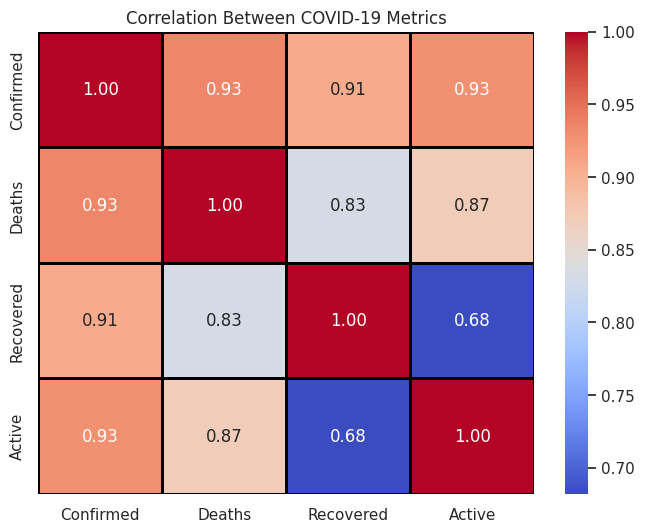

In [9]:

corr = covid19_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Between COVID-19 Metrics')
plt.show()


Mobility change


<ipython-input-10-80c431d3aba0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mobility_countries['retail_and_recreation_percent_change_from_baseline'],


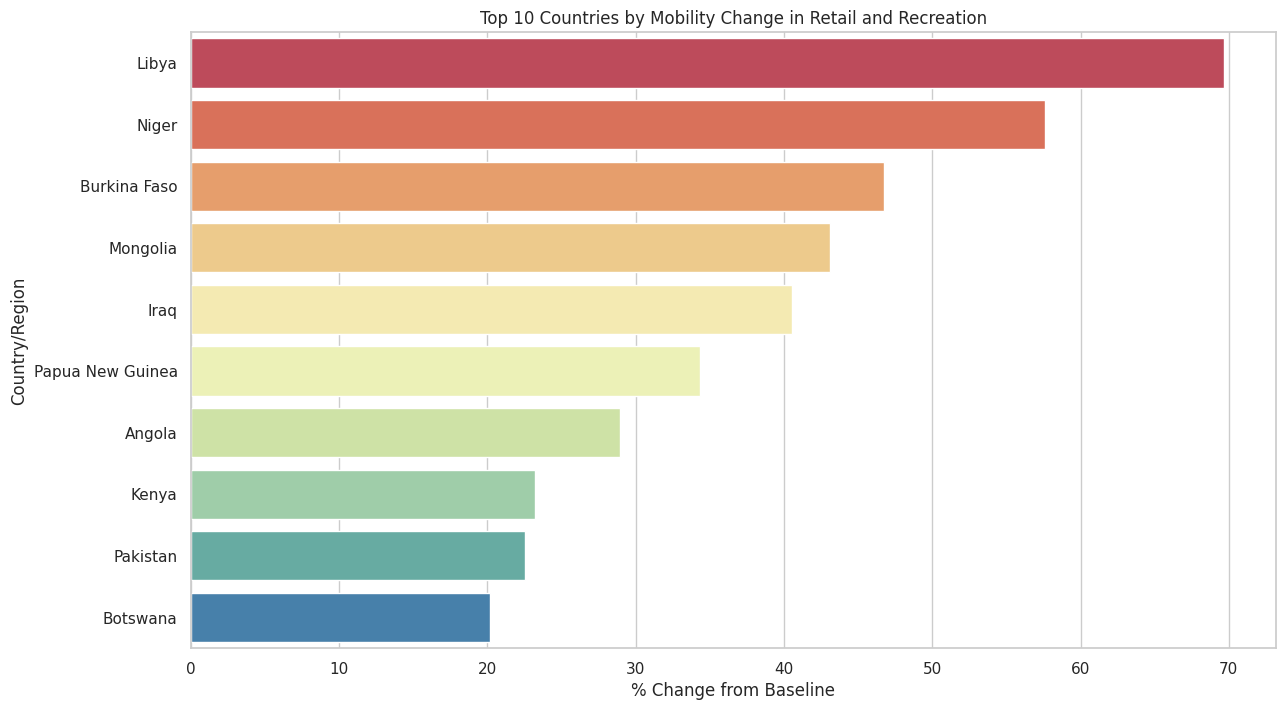

<ipython-input-10-80c431d3aba0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_workplace_mobility['workplaces_percent_change_from_baseline'],


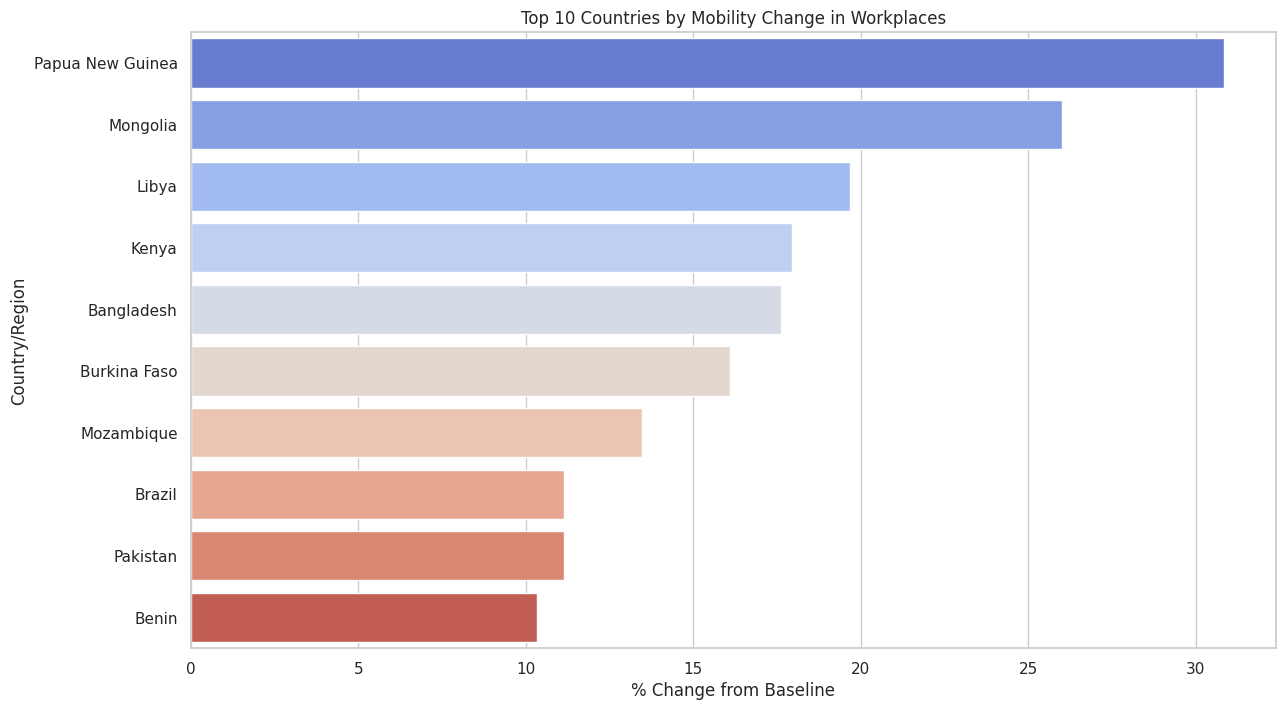

In [10]:

top_mobility_countries = covid_mobility_df.groupby('Country/Region').agg(
    {'retail_and_recreation_percent_change_from_baseline': 'mean'}).sort_values(
    by='retail_and_recreation_percent_change_from_baseline', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_mobility_countries['retail_and_recreation_percent_change_from_baseline'],
            y=top_mobility_countries.index, palette='Spectral')
plt.title('Top 10 Countries by Mobility Change in Retail and Recreation')
plt.xlabel('% Change from Baseline')
plt.ylabel('Country/Region')
plt.show()


top_workplace_mobility = covid_mobility_df.groupby('Country/Region').agg(
    {'workplaces_percent_change_from_baseline': 'mean'}).sort_values(
    by='workplaces_percent_change_from_baseline', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_workplace_mobility['workplaces_percent_change_from_baseline'],
            y=top_workplace_mobility.index, palette='coolwarm')
plt.title('Top 10 Countries by Mobility Change in Workplaces')
plt.xlabel('% Change from Baseline')
plt.ylabel('Country/Region')
plt.show()


GDP vs Mobility chnage


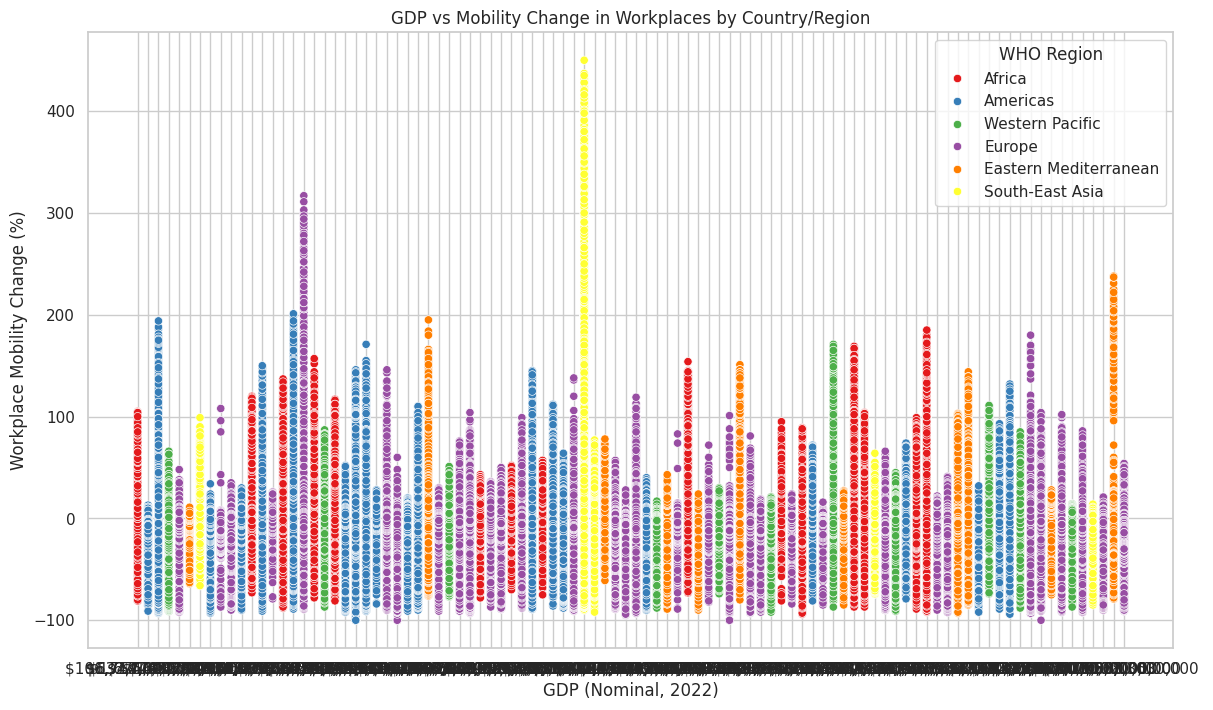

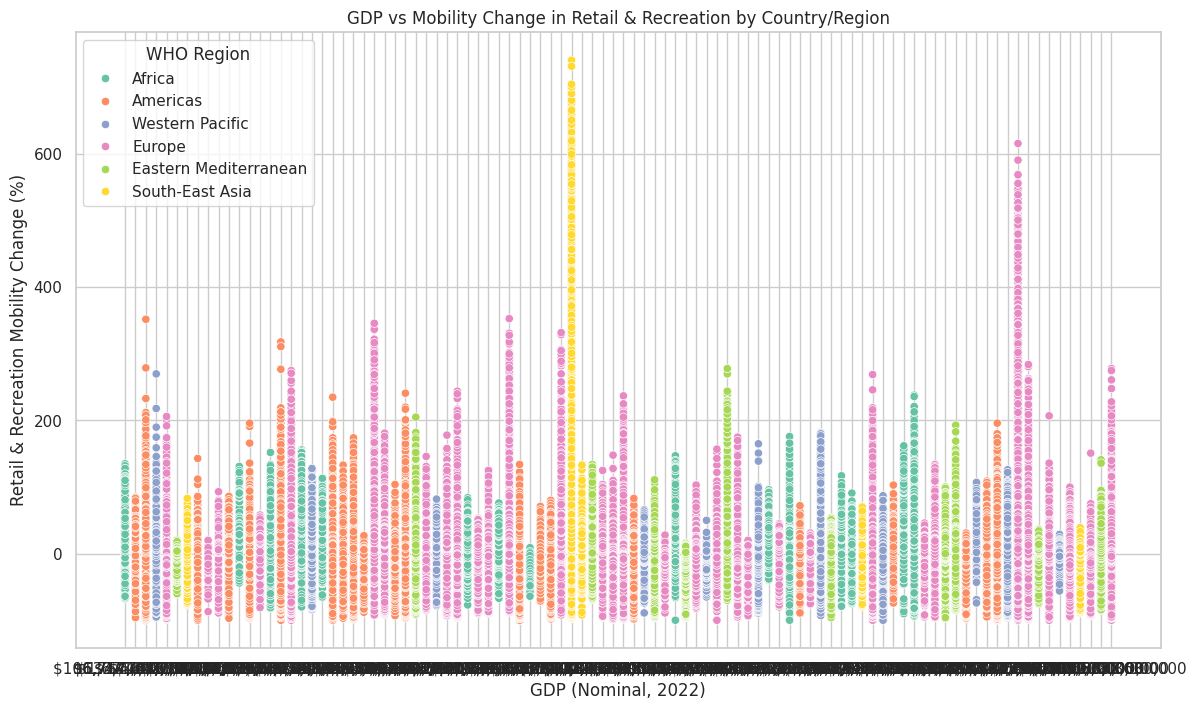

In [11]:

plt.figure(figsize=(14, 8))
sns.scatterplot(x='GDP\n(nominal, 2022)', y='workplaces_percent_change_from_baseline',
                data=covid_mobility_df, hue='WHO Region', palette='Set1')
plt.title('GDP vs Mobility Change in Workplaces by Country/Region')
plt.xlabel('GDP (Nominal, 2022)')
plt.ylabel('Workplace Mobility Change (%)')
plt.show()


plt.figure(figsize=(14, 8))
sns.scatterplot(x='GDP\n(nominal, 2022)', y='retail_and_recreation_percent_change_from_baseline',
                data=covid_mobility_df, hue='WHO Region', palette='Set2')
plt.title('GDP vs Mobility Change in Retail & Recreation by Country/Region')
plt.xlabel('GDP (Nominal, 2022)')
plt.ylabel('Retail & Recreation Mobility Change (%)')
plt.show()


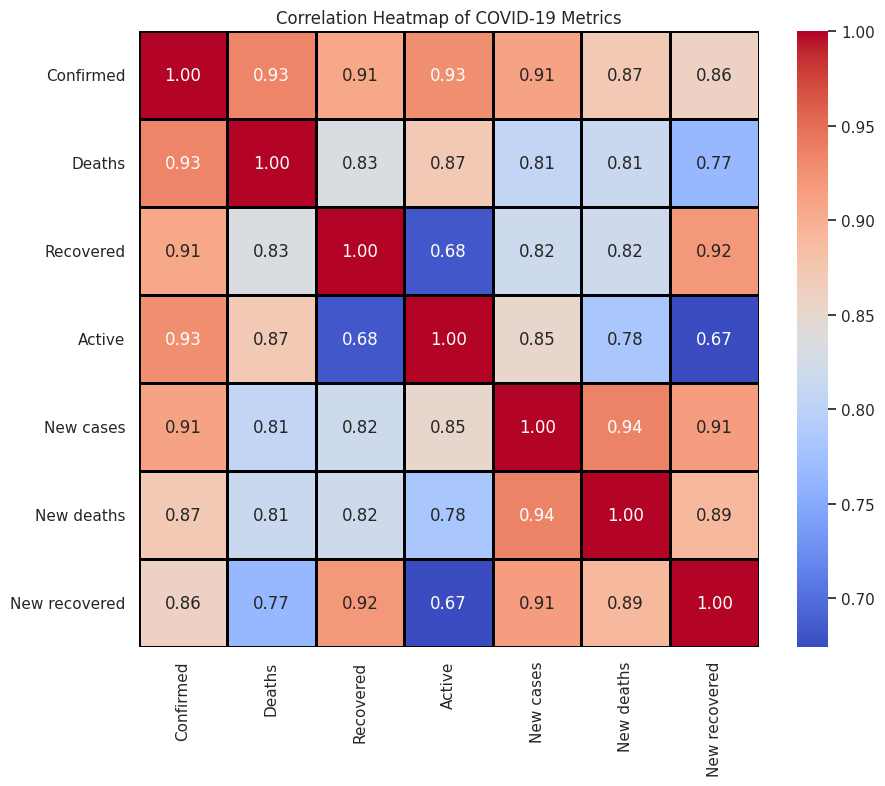

In [15]:
# Calculate the correlation matrix for numerical variables
corr = covid19_df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()


GDP vs Mobility vs covid19


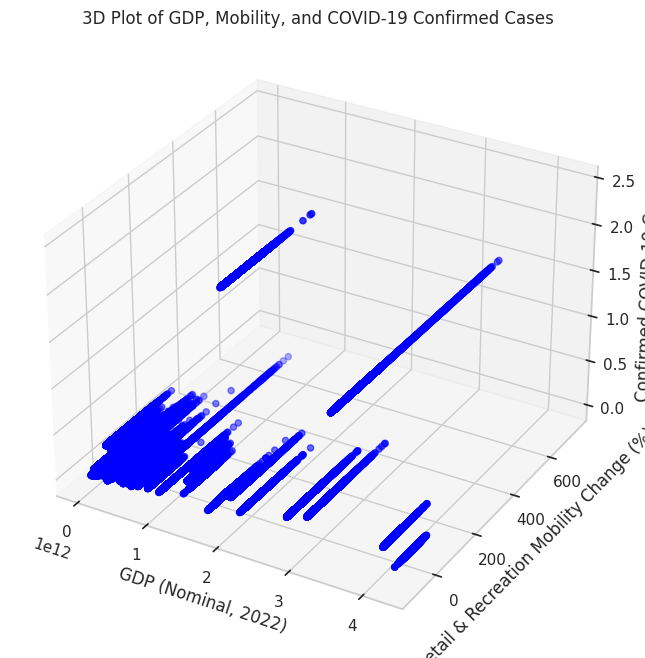

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'covid19_df', 'gdp_df', and 'covid_mobility_df' are your loaded dataframes

# Clean the GDP column (remove currency symbols and commas)
gdp_df['GDP\n(nominal, 2022)'] = gdp_df['GDP\n(nominal, 2022)'].replace({'\$': '', ',': ''}, regex=True)

# Convert the GDP column to numeric values (invalid entries will become NaN)
gdp_df['GDP\n(nominal, 2022)'] = pd.to_numeric(gdp_df['GDP\n(nominal, 2022)'], errors='coerce')

# Merge the datasets on 'Country/Region'
merged_df = covid19_df[['Country/Region', 'Confirmed']].merge(gdp_df[['Country/Region', 'GDP\n(nominal, 2022)']], on='Country/Region', how='inner')
merged_df = merged_df.merge(covid_mobility_df[['country_region', 'retail_and_recreation_percent_change_from_baseline']], left_on='Country/Region', right_on='country_region', how='inner')

# Drop rows with NaN values for relevant columns
merged_df.dropna(subset=['GDP\n(nominal, 2022)', 'retail_and_recreation_percent_change_from_baseline', 'Confirmed'], inplace=True)

# 3D Scatter Plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(merged_df['GDP\n(nominal, 2022)'],
           merged_df['retail_and_recreation_percent_change_from_baseline'],
           merged_df['Confirmed'],
           c='blue', marker='o')

ax.set_xlabel('GDP (Nominal, 2022)')
ax.set_ylabel('Retail & Recreation Mobility Change (%)')
ax.set_zlabel('Confirmed COVID-19 Cases')

plt.title('3D Plot of GDP, Mobility, and COVID-19 Confirmed Cases')
plt.show()


In [19]:
from google.colab import auth
auth.authenticate_user()


In [20]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [21]:
!git clone https://github.com/Jothireddy/covid19_analysis.git


Cloning into 'covid19_analysis'...


FileNotFoundError: [Errno 2] No such file or directory: 'output_image.png'